# Problem Statement

Walmart Inc. aims to analyze customer purchasing behavior to better understand the differences in spending habits based on demographic factors such as gender, marital status, and age. Specifically, the company wants to determine whether spending patterns on Black Friday differ significantly between male and female customers and across other demographic groups. By leveraging transactional data, Walmart seeks to:

1. **Identify Spending Patterns**: Analyze the purchase amounts for male and female customers to determine if women spend more than men on Black Friday.
2. **Calculate Confidence Intervals**: Use statistical methods, including the Central Limit Theorem, to estimate the average spending of the entire population based on sample data and assess the reliability of these estimates.
3. **Explore Demographic Insights**: Extend the analysis to marital status (married vs. unmarried) and age groups, categorizing customers into life stages (e.g., 0-17, 18-25, 26-35, etc.).
4. **Detect Anomalies**: Identify null values, outliers, and other anomalies in the dataset that could affect the analysis.
5. **Provide Actionable Insights**: Draw conclusions from the analysis and provide recommendations for strategic business decisions to enhance customer engagement and maximize revenue.

The ultimate goal is to use these insights to inform targeted marketing strategies, optimize product offerings, and improve the overall shopping experience for Walmart’s diverse customer base.

#Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 202MB/s]


In [ ]:
df=pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#null values in each columns

In [ ]:
df.isnull().sum(axis=0)

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


#unique value counts in each column


In [ ]:
for col in df.columns:
    print(f"unique values in {col}={df[col].nunique()}")

unique values in User_ID=5891
unique values in Product_ID=3631
unique values in Gender=2
unique values in Age=7
unique values in Occupation=21
unique values in City_Category=3
unique values in Stay_In_Current_City_Years=5
unique values in Marital_Status=2
unique values in Product_Category=20
unique values in Purchase=18105


# Customer distributions

**Grouping by the user data**

In [ ]:
user_data_columns=['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years', 'Marital_Status']
userdata=df.groupby(user_data_columns).agg({'Purchase':'sum'})
userdata=userdata.reset_index()
userdata=userdata.rename(columns={'Purchase':'TotalPurchase'})
userdata.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,TotalPurchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001


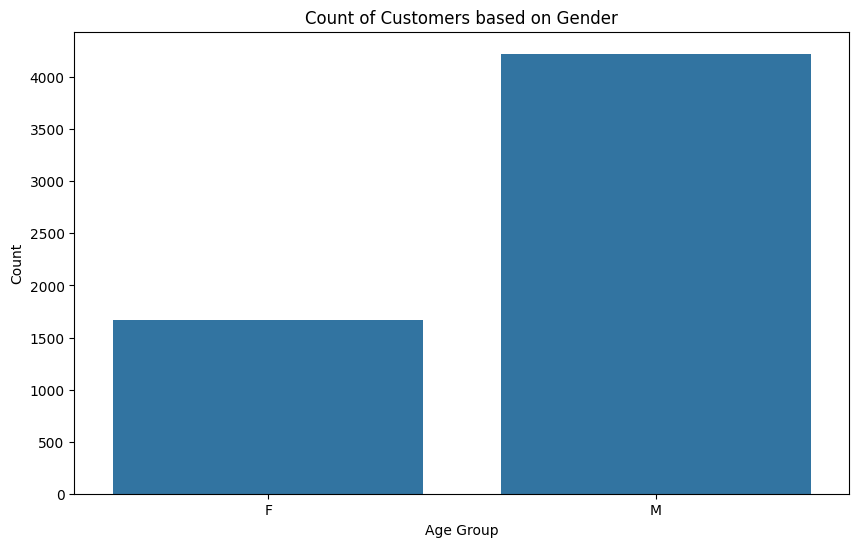

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=userdata)
plt.title('Count of Customers based on Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**SUGGESTION**: Need to attract more female customers

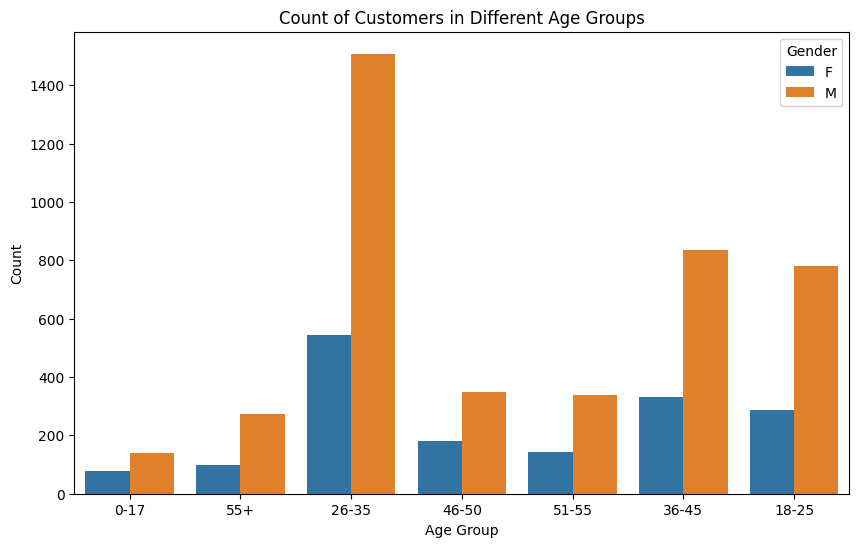

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=userdata, hue='Gender')
plt.title('Count of Customers in Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**SUGGESTION**: Try to attract more customer of age less than 18 and also greater than 45

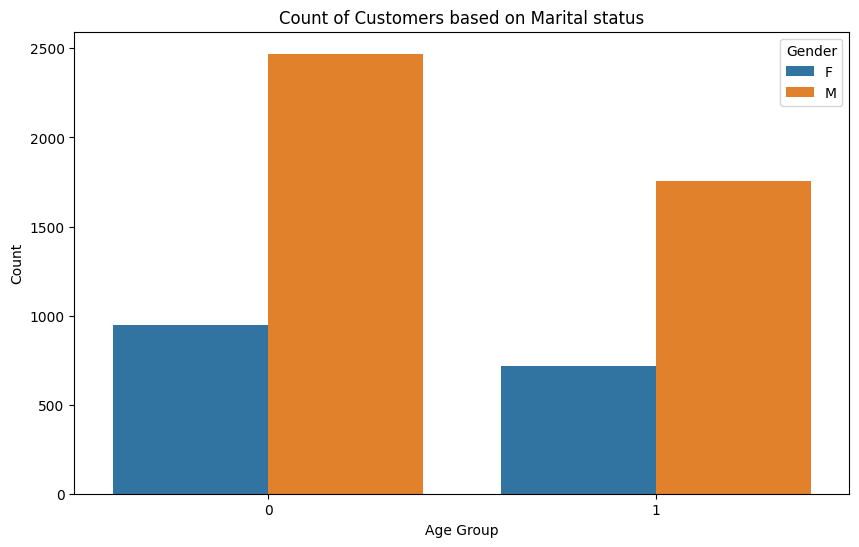

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=userdata, hue='Gender')
plt.title('Count of Customers based on Marital status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

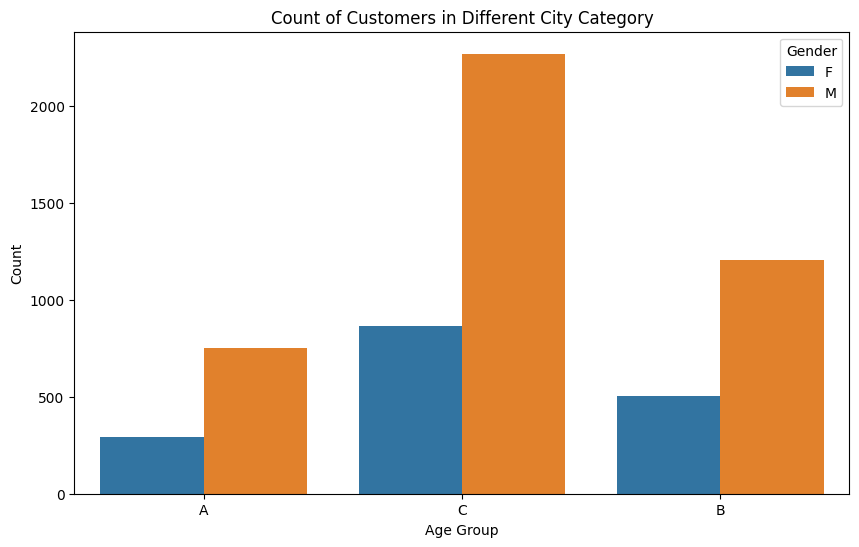

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='City_Category', data=userdata, hue='Gender')
plt.title('Count of Customers in Different City Category')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**SUGGESTION**: Need to focus on reaching customers from A, B category

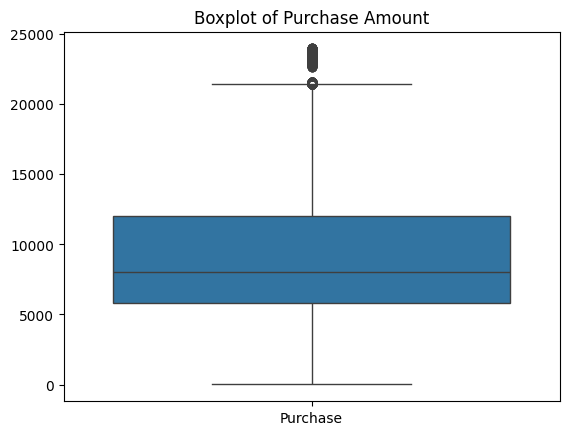

In [ ]:
sns.boxplot(data=df[['Purchase']])
plt.title('Boxplot of Purchase Amount')
plt.show()

<ipython-input-18-9a6137870ef5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase', data=df, palette='Set3')


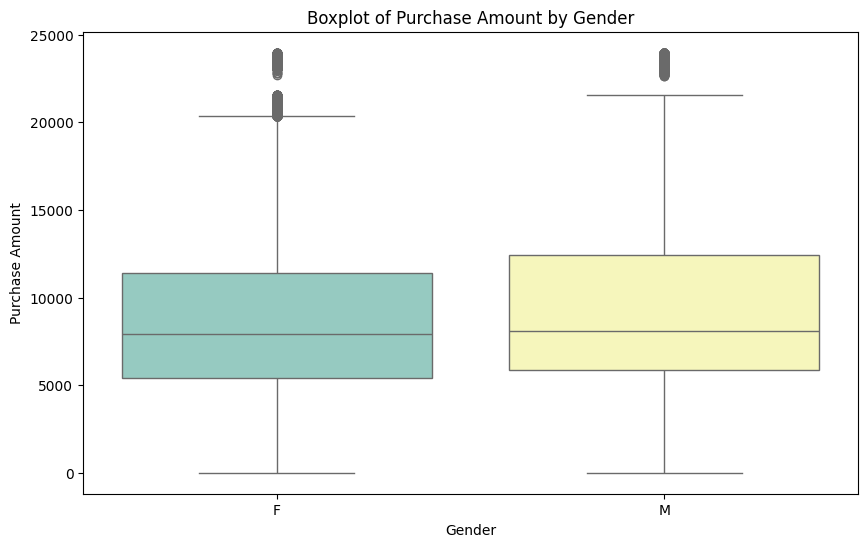

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase', data=df, palette='Set3')
plt.title('Boxplot of Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

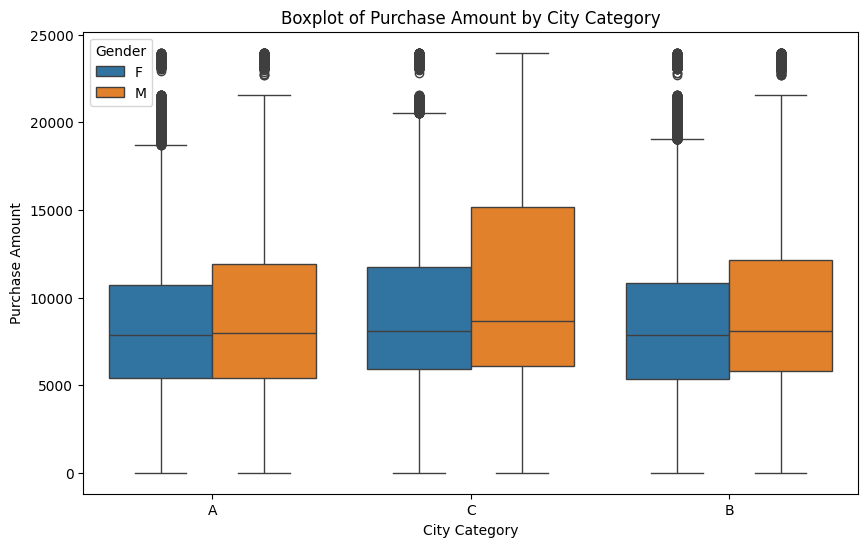

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City_Category', y='Purchase', data=df, hue='Gender')
plt.title('Boxplot of Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()

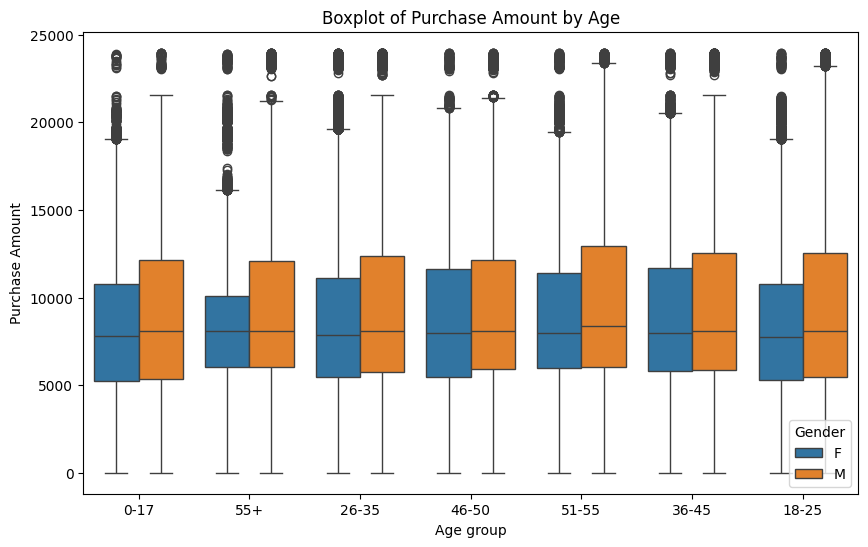

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Boxplot of Purchase Amount by Age')
plt.xlabel('Age group')
plt.ylabel('Purchase Amount')
sns.boxplot(x='Age', y='Purchase', data=df, hue='Gender')
plt.show()

Woman seems to by expensive items more than male

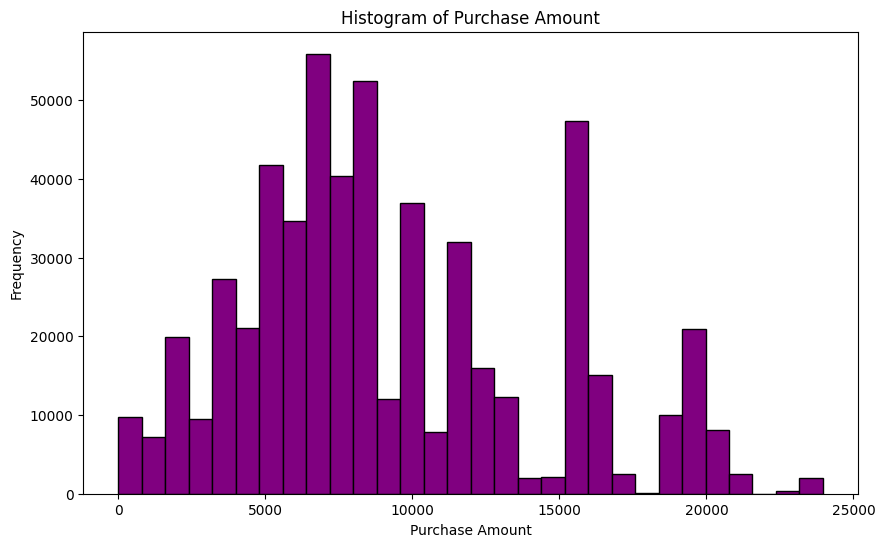

In [ ]:
# Histogram for 'Purchase' amount
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase'], bins=30, color='purple', edgecolor='black')
plt.title('Histogram of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


#Correlation

<ipython-input-23-6e43c9765095>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Gender'] = df_selected['Gender'].map({'M': 0, 'F': 1})
<ipython-input-23-6e43c9765095>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['City_Category'] = df_selected['City_Category'].map({'A': 0, 'B': 1, 'C': 2})


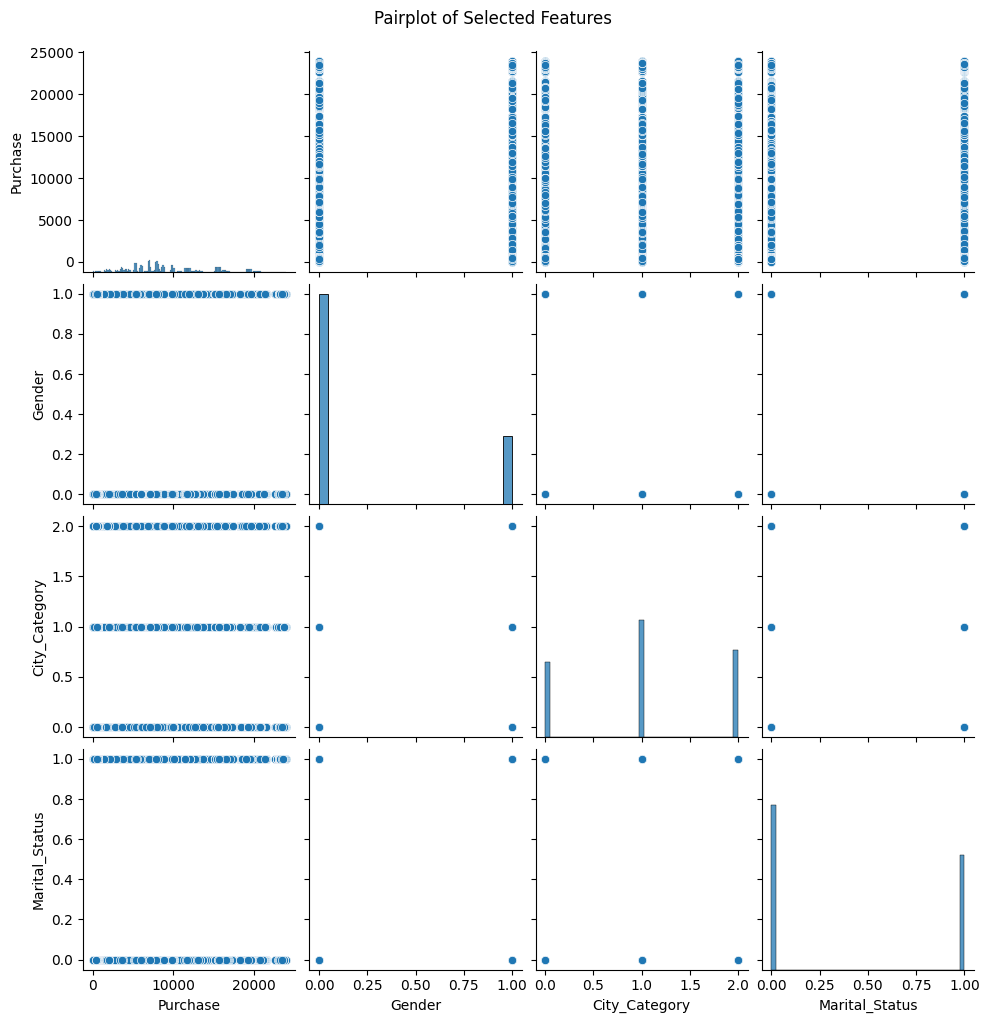

In [ ]:
selected_features = ['Purchase', 'Age', 'Gender', 'City_Category', 'Marital_Status']
df_selected = df[selected_features]

# Converting categorical variables to numeric for pairplot
df_selected['Gender'] = df_selected['Gender'].map({'M': 0, 'F': 1})
df_selected['City_Category'] = df_selected['City_Category'].map({'A': 0, 'B': 1, 'C': 2})

sns.pairplot(df_selected)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

#Mean, Median purchase

In [ ]:
mean_purchase = df['Purchase'].mean()
median_purchase = df['Purchase'].median()
print(f'Mean Purchase: {mean_purchase}')
print(f'Median Purchase: {median_purchase}')

Mean Purchase: 9263.968712959126
Median Purchase: 8047.0


#Average Male, Female Purchase

In [ ]:
# Calculate average spending by gender
avg_spending_by_gender = df.groupby('Gender')['Purchase'].mean()
print(avg_spending_by_gender)

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


In [ ]:

age_group_data = df.groupby('Age')['Purchase'].agg(['sum', 'mean']).reset_index()

print(age_group_data)

     Age         sum         mean
0   0-17   134913183  8933.464640
1  18-25   913848675  9169.663606
2  26-35  2031770578  9252.690633
3  36-45  1026569884  9331.350695
4  46-50   420843403  9208.625697
5  51-55   367099644  9534.808031
6    55+   200767375  9336.280459


In [ ]:
# Function to calculate confidence interval
def calculate_confidence_interval(data, confidence_level):
    mean = np.mean(data)
    std_error = np.std(data) / np.sqrt(len(data))
    z_score = norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * std_error
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Calculate confidence intervals for female and male spending
female_data = df[df['Gender'] == 'F']['Purchase']
male_data = df[df['Gender'] == 'M']['Purchase']

confidence_level = 0.95
female_ci = calculate_confidence_interval(female_data, confidence_level)
male_ci = calculate_confidence_interval(male_data, confidence_level)

print("Confidence interval for female spending:", female_ci)
print("Confidence interval for male spending:", male_ci)


Confidence interval for female spending: (8709.211640485983, 8759.919889824969)
Confidence interval for male spending: (9422.019466078644, 9453.032614865886)


#Analysis for Married vs. Unmarried Customers

In [ ]:
married_customers = df[df['Marital_Status'] == 1]
unmarried_customers = df[df['Marital_Status'] == 0]

90%

In [ ]:

confidence_level = 0.9
confidence_interval_married = calculate_confidence_interval(married_customers['Purchase'], confidence_level)
print(f'90% Confidence Interval for Married Customers: {confidence_interval_married}')

confidence_interval_unmarried = calculate_confidence_interval(unmarried_customers['Purchase'], confidence_level)
print(f'90% Confidence Interval for Unmarried Customers: {confidence_interval_unmarried}')

if confidence_interval_married[1] < confidence_interval_unmarried[0] or confidence_interval_unmarried[1] < confidence_interval_married[0]:
    print("The confidence intervals of average married and unmarried spending do not overlap.")
else:
    print("The confidence intervals of average married and unmarried spending overlap.")

90% Confidence Interval for Married Customers: (9243.790752476116, 9278.558395688631)
90% Confidence Interval for Unmarried Customers: (9251.396408167155, 9280.418829675858)
The confidence intervals of average married and unmarried spending overlap.


95%

In [ ]:

confidence_level = 0.95
confidence_interval_married = calculate_confidence_interval(married_customers['Purchase'], confidence_level)
print(f'95% Confidence Interval for Married Customers: {confidence_interval_married}')

confidence_interval_unmarried = calculate_confidence_interval(unmarried_customers['Purchase'], confidence_level)
print(f'95% Confidence Interval for Unmarried Customers: {confidence_interval_unmarried}')

if confidence_interval_married[1] < confidence_interval_unmarried[0] or confidence_interval_unmarried[1] < confidence_interval_married[0]:
    print("The confidence intervals of average married and unmarried spending do not overlap.")
else:
    print("The confidence intervals of average married and unmarried spending overlap.")


95% Confidence Interval for Married Customers: (9240.460473019726, 9281.88867514502)
95% Confidence Interval for Unmarried Customers: (9248.616444810585, 9283.198793032429)
The confidence intervals of average married and unmarried spending overlap.


99%

In [ ]:

confidence_level = 0.99
confidence_interval_married = calculate_confidence_interval(married_customers['Purchase'], confidence_level)
print(f'99% Confidence Interval for Married Customers: {confidence_interval_married}')

confidence_interval_unmarried = calculate_confidence_interval(unmarried_customers['Purchase'], confidence_level)
print(f'99% Confidence Interval for Unmarried Customers: {confidence_interval_unmarried}')

if confidence_interval_married[1] < confidence_interval_unmarried[0] or confidence_interval_unmarried[1] < confidence_interval_married[0]:
    print("The confidence intervals of average married and unmarried spending do not overlap.")
else:
    print("The confidence intervals of average married and unmarried spending overlap.")

99% Confidence Interval for Married Customers: (9233.951630735093, 9288.397517429654)
99% Confidence Interval for Unmarried Customers: (9243.183164125909, 9288.632073717105)
The confidence intervals of average married and unmarried spending overlap.


# Analysis for Age Groups

In [ ]:
age_labels = df['Age'].unique()

90%

In [ ]:
confidence_level=0.9

for age_group in age_labels:
    age_group_data = df[df['Age'] == age_group]['Purchase']

    confidence_interval_age = calculate_confidence_interval(age_group_data, confidence_level)

    print(f'90% Confidence Interval for Age Group {age_group}: {confidence_interval_age}')

90% Confidence Interval for Age Group 0-17: (8865.055959528509, 9001.87332136144)
90% Confidence Interval for Age Group 55+: (9280.069014759747, 9392.491904139062)
90% Confidence Interval for Age Group 26-35: (9235.10304062824, 9270.278225111535)
90% Confidence Interval for Age Group 46-50: (9170.40727722425, 9246.844117712404)
90% Confidence Interval for Age Group 51-55: (9492.161984814407, 9577.454077106064)
90% Confidence Interval for Age Group 36-45: (9306.441489413359, 9356.259900422388)
90% Confidence Interval for Age Group 18-25: (9143.43316320849, 9195.894049314087)


95%

In [ ]:
confidence_level=0.95

for age_group in age_labels:
    age_group_data = df[df['Age'] == age_group]['Purchase']

    confidence_interval_age = calculate_confidence_interval(age_group_data, confidence_level)

    print(f'95% Confidence Interval for Age Group {age_group}: {confidence_interval_age}')

95% Confidence Interval for Age Group 0-17: (8851.950669457377, 9014.97861143257)
95% Confidence Interval for Age Group 55+: (9269.300391858294, 9403.260527040515)
95% Confidence Interval for Age Group 26-35: (9231.733724119113, 9273.647541620663)
95% Confidence Interval for Age Group 46-50: (9163.085640896097, 9254.165754040558)
95% Confidence Interval for Age Group 51-55: (9483.992132719022, 9585.623929201449)
95% Confidence Interval for Age Group 36-45: (9301.669545864605, 9361.031843971143)
95% Confidence Interval for Age Group 18-25: (9138.40810556528, 9200.919106957297)


99%

In [ ]:
confidence_level=0.99

for age_group in age_labels:
    age_group_data = df[df['Age'] == age_group]['Purchase']

    confidence_interval_age = calculate_confidence_interval(age_group_data, confidence_level)

    print(f'99% Confidence Interval for Age Group {age_group}: {confidence_interval_age}')

99% Confidence Interval for Age Group 0-17: (8826.33712342187, 9040.592157468078)
99% Confidence Interval for Age Group 55+: (9248.253729256525, 9424.307189642284)
99% Confidence Interval for Age Group 26-35: (9225.148586129311, 9280.232679610464)
99% Confidence Interval for Age Group 46-50: (9148.775918018655, 9268.475476918)
99% Confidence Interval for Age Group 51-55: (9468.02462024027, 9601.5914416802)
99% Confidence Interval for Age Group 36-45: (9292.343052891047, 9370.3583369447)
99% Confidence Interval for Age Group 18-25: (9128.586915452215, 9210.740297070362)


### Recommendations for Walmart

1. **Attract Female Customers**  
   - Highlight premium products for women.  
   - Launch women-focused promotions and loyalty programs.

2. **Engage Younger (<18) & Older (>45) Customers**  
   - For <18: Promote gadgets, toys, and trendy items via social media.  
   - For >45: Focus on health, wellness, and lifestyle products.

3. **Focus on Cities A & B**  
   - Expand promotions and improve product offerings in A and B cities.  

4. **Promote Expensive Items to Women**  
   - Showcase luxury items through targeted marketing campaigns.  

5. **Age-Specific Strategies**  
   - Tailor campaigns:  
     - **18-25**: Fashion, electronics.  
     - **26-35**: Family essentials.  
     - **36-45**: Career and wellness.  
     - **51+**: Health and senior-friendly items.

6. **Target Married vs. Unmarried Customers**  
   - Married: Bundle family products.  
   - Unmarried: Focus on individual convenience items.

7. **Data-Driven Insights**  
   - Regularly analyze spending patterns and adjust strategies.  
   - Use confidence intervals for informed pricing and promotions.  

These actions can enhance engagement, improve customer targeting, and increase revenue.